<a href="https://colab.research.google.com/github/chalsai/Titanic-Project-Optimizing-Neural-Networks/blob/main/Week_9_Wed_Titanic_Project_Optimizing_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. In this challenge, you have been tasked to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). You will be required to perform feature engineering then tune your most accurate model.

### b) Defining the Metric for Success

We will use the accuracy score as a metric for our success with 80% as success.

### c) Understanding the Context 

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis (Univariate and Bivariate)
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

The data is appropriate for the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [2]:
# loading and previewing the train dataset
train = pd.read_csv('https://bit.ly/31azYjb')
train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
539,540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.500,B39,C
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,STON/O 2. 3101280,7.925,NaN,S


In [3]:
# loading and previewing the test dataset
test = pd.read_csv('https://bit.ly/2XmmAYe ')
test.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
203,1095,2,"Quick, Miss. Winifred Vera",female,8.0,1,1,26360,26.0000,NaN,S


In [4]:
# checking the datasets' shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [5]:
# checking data types of Train
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# checking data types of Test
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# dropping duplicates, if any
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [8]:
# checking for missing data in Train
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# replacing missing 'Age' values with column mean and 'Embarked' with mode in train
train['Age'].fillna(train['Age'].mean(), inplace = True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

# dropping 'Cabin' since it has too many missing values to impute
train.drop(columns = ['Cabin'], inplace = True)

# confirming we don't have any missing values
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [5]:
# checking for missing data in Test
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# repacing missing 'Age' and 'Fare' values with their respective mean in test
test['Age'].fillna(test['Age'].mean(), inplace = True)
test['Fare'].fillna(test['Fare'].mean(), inplace = True)

# dropping 'Cabin' since it has too many missing values to impute
test.drop(columns = ['Cabin'], inplace = True)

# confirming we don't have any missing values
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

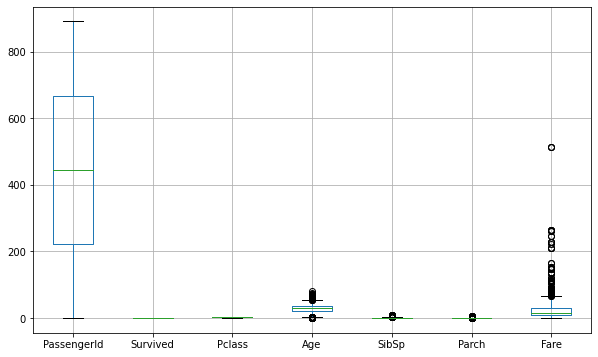

In [7]:
# visualizing the distribution of outliers - Train
plt.figure(figsize = (10, 6))
train.boxplot()
plt.show()

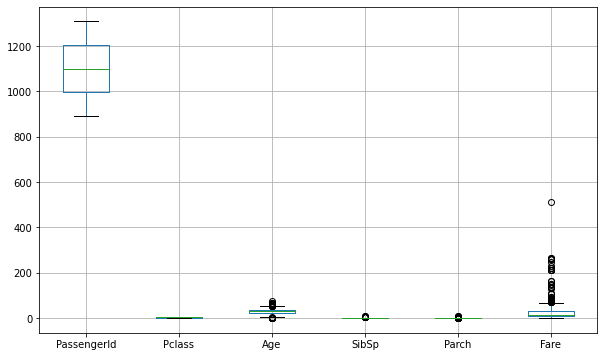

In [8]:
# visualizing the distribution of outliers - Test
plt.figure(figsize = (10, 6))
test.boxplot()
plt.show()

# <font color='#2F4F4F'>3. Data Analysis</font>

## 3.1 Feature Engineering

### 3.1.1 Getting the Title

In [9]:
# Train
# extracting the title from the name
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.')

# dropping 'Name'
train.drop(columns = ['Name'], inplace = True)

# previewing the changes
train.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
816,817,0,3,female,23.0,0,0,STON/O2. 3101290,7.9250,S,Miss
836,837,0,3,male,21.0,0,0,315097,8.6625,S,Mr
161,162,1,2,female,40.0,0,0,C.A. 33595,15.7500,S,Mrs


In [10]:
# Test
# extracting the title from the name
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.')

# dropping 'Name'
test.drop(columns = ['Name'], inplace = True)

# previewing the changes
test.sample(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
335,1227,1,male,30.0,0,0,110469,26.0000,S,Mr
209,1101,3,male,25.0,0,0,349250,7.8958,S,Mr
162,1054,2,female,26.0,0,0,220844,13.5000,S,Miss


### 3.1.2 Getting the Family Size

In [11]:
# Train
# add new column 'FamilySize' which consists of SibSp plus Parch plus 1 (the passenger himself/herself)
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

train.sample(3)


#X_train = df_train.drop("Survived", axis=1)
#y_train = df_train.Survived

#X_test = df_test.copy()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
100,101,0,3,female,28.0,0,0,349245,7.8958,S,Miss,1
115,116,0,3,male,21.0,0,0,STON/O 2. 3101294,7.9250,S,Mr,1
373,374,0,1,male,22.0,0,0,PC 17760,135.6333,C,Mr,1


In [12]:
# Test
# add new column 'FamilySize' which consists of SibSp plus Parch plus 1 (the passenger himself/herself)

test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

test.sample(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
312,1204,3,male,30.27259,0,0,LP 1588,7.5750,S,Mr,1
81,973,1,male,67.00000,1,0,PC 17483,221.7792,S,Mr,2
344,1236,3,male,30.27259,1,1,A/5. 851,14.5000,S,Master,3


### 3.1.3 Getting the Fare per Person

In [13]:
# Train
# create new variable 'FarePerPerson' which is Fare / FamilySize

train["FarePerPerson"] = train["Fare"] / train["FamilySize"]

train.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,FarePerPerson
505,506,0,1,male,18.000000,1,0,PC 17758,108.9,C,Mr,2,54.45
808,809,0,2,male,39.000000,0,0,248723,13.0,S,Mr,1,13.00
431,432,1,3,female,29.699118,1,0,376564,16.1,S,Mrs,2,8.05


In [14]:
# Test
# create new variable 'FarePerPerson' which is Fare / FamilySize

test["FarePerPerson"] = test["Fare"] / test["FamilySize"]

test.sample(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,FarePerPerson
45,937,3,male,25.0,0,0,STON/O 2. 3101291,7.925,S,Mr,1,7.925
175,1067,2,female,15.0,0,2,29750,39.000,S,Miss,3,13.000
79,971,3,female,24.0,0,0,368702,7.750,Q,Miss,1,7.750


In [15]:
# dropping unneeded columns 'PassengerId' and 'Ticket'
train.drop(columns = ['PassengerId', 'Ticket'], inplace = True)
test.drop(columns = ['PassengerId', 'Ticket'], inplace = True)

# dropping duplicates
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

# preview the datasets' shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (787, 11)
Test shape: (383, 10)


In [16]:
# saving to clean CSV files
train.to_csv('train_clean.csv', index = False)
test.to_csv('test_clean.csv', index = False)



In [19]:
print (train.head(1))

   Survived  Pclass   Sex   Age  SibSp  Parch  Fare Embarked Title  \
0         0       3  male  22.0      1      0  7.25        S    Mr   

   FamilySize  FarePerPerson  
0           2          3.625  


## 3.2 Univariate Analysis 

### 3.2.1 Train dataset

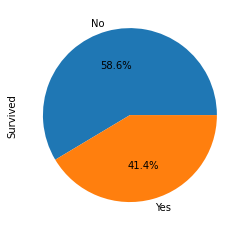

In [20]:
# distribution of those who survived vs those who didn't
plt.figure(figsize = (4, 4))
train.Survived.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', labels = ["No", "Yes"])
plt.show()

A little over half of the passengers did not survive the sinking of the ship.

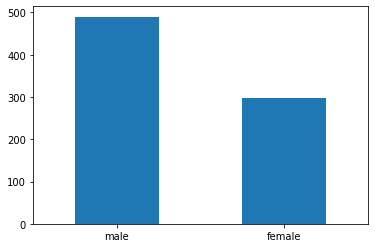

In [21]:
# distribution of gender
plt.figure(figsize = (6, 4))
train.Sex.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

There are more male passengers than female passengers in this dataset.

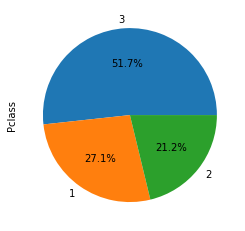

In [22]:
# distribution of class
plt.figure(figsize = (4, 4))
train.Pclass.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

Majority of the passengers are in 3rd class followed by those in 1st class.

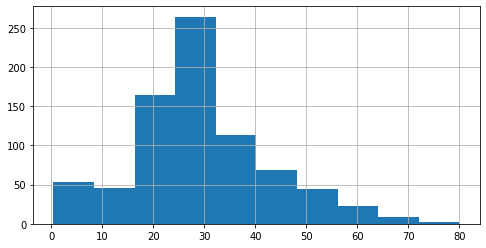

In [23]:
# distribution of age
plt.figure(figsize = (8, 4))
train.Age.hist()
plt.show()

Majority of the passengers are between 24-31 years. Minority are 55 and above.

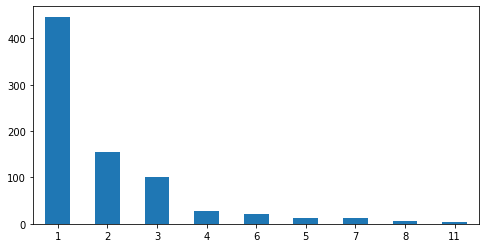

In [24]:
# distribution of family size
plt.figure(figsize = (8, 4))
train.FamilySize.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the passengers were travelling alone. The second and third biggest portion of the passengers had 1 and 2 other family members with them respectively.

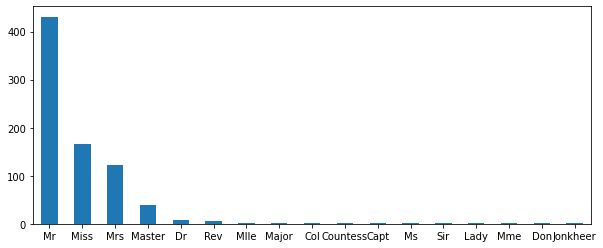

In [25]:
# distribution by title
plt.figure(figsize = (10, 4))
train.Title.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Common titles such as 'Mr.', 'Mrs.', and 'Miss' made up the vast majority of the titles used.

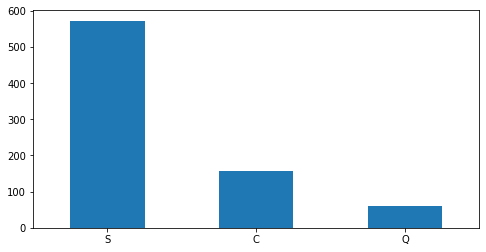

In [26]:
# distribution of 'Embarked'
plt.figure(figsize = (8, 4))
train.Embarked.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the passengers embarked at point S.

### 3.2.2 Test dataset

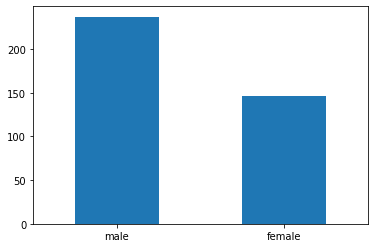

In [27]:
# distribution of gender
plt.figure(figsize = (6, 4))
test.Sex.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

There are more male passengers than female passengers in this dataset.

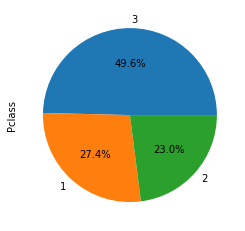

In [28]:
# distribution of class
plt.figure(figsize = (4, 4))
test.Pclass.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

Majority of the passengers are in 3rd class followed by those in 1st class.

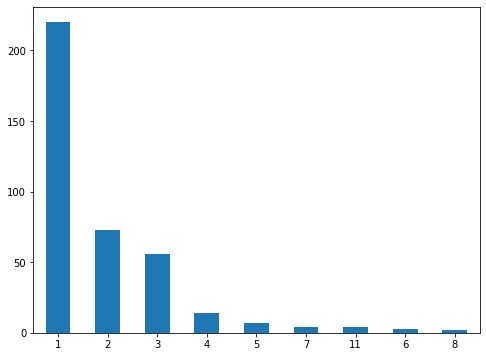

In [29]:
# distribution of family size
plt.figure(figsize = (8, 6))
test.FamilySize.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the passengers were travelling alone. The second and third biggest portion of the passengers had 1 and 2 other family members with them respectively.

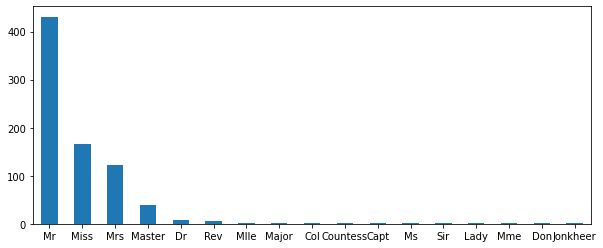

In [30]:
# distribution by title
plt.figure(figsize = (10, 4))
train.Title.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Common titles such as 'Mr.', 'Mrs.', and 'Miss' made up the vast majority of the titles used.

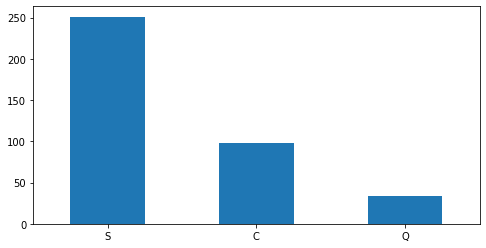

In [31]:
# distribution of 'Embarked'
plt.figure(figsize = (8, 4))
test.Embarked.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the passengers embarked at point S.

## 3.3 Bivariate Analysis

We will look at how the other variables relate to the target variable ('Survived') in the Train dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


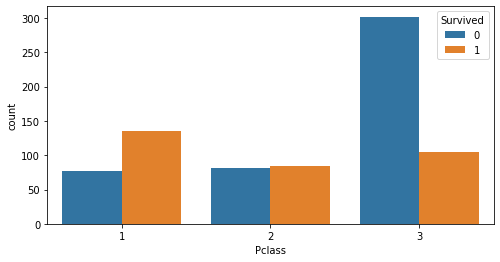

In [32]:
# distribution of Survived by class
plt.figure(figsize = (8, 4))
sns.countplot(train['Pclass'], hue = train['Survived'])
plt.show()

Majority of those who survived were in 1st class. Majority of those who died were in 3rd class.

Majority of those who survived were female while majority of those who died were male.

Majority of those who survived were the women, including those with superior titles like Mme, Mlle, and Countess. Majority of those who died were men, including those with superior titles like Col, Capt, and Jonkheer.

Those who embarked at point S survived and died more than their counterparts who embarked at points C and Q.

## 3.4 Feature Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

# encoding Sex
le_sex = LabelEncoder().fit(train['Sex'].unique())
sex_classes = le_sex.classes_
train['Sex'] = le_sex.transform(train['Sex'].values)
test['Sex'] = le_sex.transform(test['Sex'].values)




In [34]:
# encoding Embarked

le_Embarked = LabelEncoder().fit(train['Embarked'].unique())
Embarked_classes = le_Embarked.classes_
train['Embarked'] = le_Embarked.transform(train['Embarked'].values)
test['Embarked'] = le_Embarked.transform(test['Embarked'].values)


In [35]:

# encoding Title

le_Title = LabelEncoder().fit(train['Title'].unique())
Title_classes = le_Title.classes_
train['Title'] = le_Title.fit_transform(train['Title'].values)
test['Title'] = le_Title.fit_transform(test['Title'].values)


In [36]:
# previewing our modified datatypes
print("Train:")
print(train.dtypes)
print()
print("Test:")
print(test.dtypes)

Train:
Survived           int64
Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked           int64
Title              int64
FamilySize         int64
FarePerPerson    float64
dtype: object

Test:
Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked           int64
Title              int64
FamilySize         int64
FarePerPerson    float64
dtype: object


In [44]:
#combine
full_df = pd.concat(
    [
        train.drop(["Survived"], axis=1)
    ]
)
y_train = train["Survived"].values

In [45]:
#check
print (full_df.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title  FamilySize  \
0       3    1  22.0      1      0   7.2500         2     12           2   
1       1    0  38.0      1      0  71.2833         0     13           2   
2       3    0  26.0      0      0   7.9250         2      9           1   
3       1    0  35.0      1      0  53.1000         2     13           2   
4       3    1  35.0      0      0   8.0500         2     12           1   

   FarePerPerson  
0        3.62500  
1       35.64165  
2        7.92500  
3       26.55000  
4        8.05000  


In [47]:
#check null
full_df.isna().sum()

Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
FamilySize       0
FarePerPerson    0
dtype: int64

In [48]:
# some quick inspections
print(train.shape, test.shape, train.columns.values)

(787, 11) (383, 10) ['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked' 'Title'
 'FamilySize' 'FarePerPerson']


# <font color='#2F4F4F'>4. Data Modeling</font>

In [56]:
# splitting Train data into features (X) and label (Y)
# ---
#
#Let's split the data back into training and test data

X_train = full_df[:y_train.shape[0]]
X_test = full_df[y_train.shape[0]:]

print(f"Train X shape: {X_train.shape}")
print(f"Train y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}")

Train X shape: (787, 10)
Train y shape: (787,)
Test X shape: (0, 10)


In [57]:
# Performing feature scaling
# ---
#
one_hot_cols = ["Embarked", "Title"]
for col in one_hot_cols:
    full_df = pd.concat(
        [full_df, pd.get_dummies(full_df[col], prefix=col)], 
        axis=1, 
        join="inner",
    )
full_df = full_df.drop(one_hot_cols, axis=1)


In [59]:
# Creating our data structure
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
full_df.loc[:] = scaler.fit_transform(full_df)

In [61]:
full_df

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,FarePerPerson,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,Title_7,Title_8,Title_9,Title_10,Title_11,Title_12,Title_13,Title_14,Title_15,Title_16
0,0.883694,0.778539,-0.571132,0.458674,-0.497958,-0.528751,0.032833,-0.468855,-0.497219,-0.284682,0.613086,-0.035669,-0.050475,-0.035669,-0.035669,-0.094733,-0.035669,-0.035669,-0.050475,-0.22834,-0.518994,-0.050475,-0.035669,0.908838,-0.430396,-0.035669,-0.087650,-0.035669
1,-1.461895,-1.284458,0.601639,0.458674,-0.497958,0.701308,0.032833,0.378493,2.011187,-0.284682,-1.631093,-0.035669,-0.050475,-0.035669,-0.035669,-0.094733,-0.035669,-0.035669,-0.050475,-0.22834,-0.518994,-0.050475,-0.035669,-1.100306,2.323440,-0.035669,-0.087650,-0.035669
2,0.883694,-1.284458,-0.277939,-0.522240,-0.497958,-0.515784,-0.613149,-0.355052,-0.497219,-0.284682,0.613086,-0.035669,-0.050475,-0.035669,-0.035669,-0.094733,-0.035669,-0.035669,-0.050475,-0.22834,1.926804,-0.050475,-0.035669,-1.100306,-0.430396,-0.035669,-0.087650,-0.035669
3,-1.461895,-1.284458,0.381744,0.458674,-0.497958,0.352013,0.032833,0.137875,-0.497219,-0.284682,0.613086,-0.035669,-0.050475,-0.035669,-0.035669,-0.094733,-0.035669,-0.035669,-0.050475,-0.22834,-0.518994,-0.050475,-0.035669,-1.100306,2.323440,-0.035669,-0.087650,-0.035669
4,0.883694,0.778539,0.381744,-0.522240,-0.497958,-0.513383,-0.613149,-0.351744,-0.497219,-0.284682,0.613086,-0.035669,-0.050475,-0.035669,-0.035669,-0.094733,-0.035669,-0.035669,-0.050475,-0.22834,-0.518994,-0.050475,-0.035669,0.908838,-0.430396,-0.035669,-0.087650,-0.035669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.289100,0.778539,-0.204641,-0.522240,-0.497958,-0.418295,-0.613149,-0.220737,-0.497219,-0.284682,0.613086,-0.035669,-0.050475,-0.035669,-0.035669,-0.094733,-0.035669,-0.035669,-0.050475,-0.22834,-0.518994,-0.050475,-0.035669,-1.100306,-0.430396,-0.035669,11.409061,-0.035669
887,-1.461895,-1.284458,-0.791027,-0.522240,-0.497958,-0.091731,-0.613149,0.229182,-0.497219,-0.284682,0.613086,-0.035669,-0.050475,-0.035669,-0.035669,-0.094733,-0.035669,-0.035669,-0.050475,-0.22834,1.926804,-0.050475,-0.035669,-1.100306,-0.430396,-0.035669,-0.087650,-0.035669
888,0.883694,-1.284458,-0.006801,0.458674,1.891635,-0.217554,1.324796,-0.409638,-0.497219,-0.284682,0.613086,-0.035669,-0.050475,-0.035669,-0.035669,-0.094733,-0.035669,-0.035669,-0.050475,-0.22834,1.926804,-0.050475,-0.035669,-1.100306,-0.430396,-0.035669,-0.087650,-0.035669
889,-1.461895,0.778539,-0.277939,-0.522240,-0.497958,-0.091731,-0.613149,0.229182,2.011187,-0.284682,-1.631093,-0.035669,-0.050475,-0.035669,-0.035669,-0.094733,-0.035669,-0.035669,-0.050475,-0.22834,-0.518994,-0.050475,-0.035669,0.908838,-0.430396,-0.035669,-0.087650,-0.035669


## 4.1 Normal Modeling

In [62]:
# Neural networks library and modules
 
X_train_norm = full_df[:y_train.shape[0]]
X_test_norm = full_df[y_train.shape[0]:]

print(f"Train norm X shape: {X_train_norm.shape}")
print(f"Train y shape: {y_train.shape}")
print(f"Test norm X shape: {X_test_norm.shape}")


Train norm X shape: (787, 28)
Train y shape: (787,)
Test norm X shape: (0, 28)


In [63]:
# Let's highlight categorical features in one list, since they may be needed for some models
categorical_columns = ['Sex', 'Embarked', 'Title', 'TicketNumber', 'IsAlone']

In [64]:
#Save mean cross-validated accuracy scores of best models

cross_valid_scores = {}

In [71]:
import os
import random
def set_seed(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ["PYTHONHASHSEED"] = str(seed_value)
    

SEED = 42
set_seed(SEED)

In [73]:

# Compiling the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
# Decision Tree

parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_desicion_tree = DecisionTreeClassifier(
    random_state=SEED,
    class_weight='balanced',
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_desicion_tree.best_score_
print('-----')

-----
Best parameters {'max_depth': 5}
Mean cross-validated accuracy score of the best_estimator: 0.784
-----


## 4.2 Modeling with Grid Search

For this example, we will use the Runtime type -> TPU (Tensorfolow Processing Unit). To change run type go to Menu -> Runtime -> Change runtime type -> TPU.

In [76]:

from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

in_shape = X_train.shape[1]

def create_model(optimizer='Adam', neurons=50):
    # Initialize the constructor
    model = Sequential()
    # Input - Layer
    model.add(Dense(neurons, input_dim=in_shape, activation=activation))
    # Hidden - Layers
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation = activation))
    # Output- Layer
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def nn_hyperparameter_optimization():
    model = KerasClassifier(build_fn=create_model, verbose=0)
    # defining the grid search parameters
    neurons = [65, 75, 85]
    batch_size= [10, 20, 30, 40]
    epochs= [10, 20, 30, 40]
    optimizer = ['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
    activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
    dropout_rate = [0.1, 0.2, 0.3, 0.4, 0.5]
    param_grid = dict(neurons=neurons,
                      optimizer=optimizer,
                      batch_size=batch_size,
                      epochs=epochs,
                      activation=activation,
                      dropout_rate=dropout_rate)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
    grid_result = grid.fit(X_train, y_train)

    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    return grid_result

## based on the hyper parameter optimization, the below model is built.
nn_model = Sequential()
# Input - Layer
nn_model.add(Dense(65, input_dim=in_shape, activation='relu'))
# Hidden - Layers
nn_model.add(Dropout(0.2))
nn_model.add(Dense(65, activation = 'relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(65, activation = 'relu'))
# Output- Layer
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])
nn_model.fit(X_train, y_train,
          batch_size=20,
          epochs=20,
          verbose=1,
          validation_data=(X_test, X_test_norm))

score = nn_model.evaluate(X_test, X_test_norm, verbose=2)
score_nn = score[1]
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
40/40 [==============================] - 1s 3ms/step - loss: 0.9342 - accuracy: 0.6048
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.8013 - accuracy: 0.6061
Epoch 3/20
40/40 [==============================] - 0s 2ms/step - loss: 0.7787 - accuracy: 0.6252
Epoch 4/20
40/40 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.6595
Epoch 5/20
40/40 [==============================] - 0s 2ms/step - loss: 0.7135 - accuracy: 0.6557
Epoch 6/20
40/40 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6404
Epoch 7/20
40/40 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6506
Epoch 8/20
40/40 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.6582
Epoch 9/20
40/40 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.6709
Epoch 10/20
40/40 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.6645
Epoch 11/20
40/40 [

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:981: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: ignored

Your observation ...

In [ ]:
xTest = test[selFeatures]
xTest = handle_categorical_na(xTest)
## using One Hot Encoding for handling categorical data
xTest = pd.get_dummies(xTest,columns=['Embarked','Sex'],prefix=['Embarked','Sex'])
common_col = [x for x in xTest.columns if x in X_train.columns]
xTest = xTest[common_col]
missing_col = [x for x in X_train.columns if x not in xTest.columns]
## Inserting missing columns in test data
for val in missing_col:
    xTest.insert(xTest.shape[1], val, pd.Series(np.zeros(xTest.shape[0])))
col_names = xTest.columns
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
xTest = my_imputer.fit_transform(xTest)
xTest = pd.DataFrame(xTest)
xTest.columns = col_names

submission = pd.DataFrame()
## Comparing and submitting the best result
if score_nn>score_rf:
    predictions = nn_model.predict_classes(xTest)
    predictions = [x[0] for x in predictions]
else:
    predictions = rf_model.predict(xTest)
submission = pd.DataFrame({'PassengerId': testData.PassengerId, 'Survived': predictions})
submission.to_csv('Data/submission.csv', index=False)
submission.head()

# <font color='#2F4F4F'>5. Summary of Findings</font>

Our model predicts 81% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 73 % of the people who actually survived.